# Multi-modality pipeline: analyzing single-cell multiome data (ATAC + Gene Expression)

## Introduction

In this tutorial we will analyze single-cell multiome data data from Peripheral blood mononuclear cells (PBMCs). The dataset used in this tutorial can be found here: http://renlab.sdsc.edu/kai/10x-Multiome/.

In addition to SnapATAC2, we will utilize [scanpy](https://scanpy.readthedocs.io/en/stable/) to preprocess the scRNA-seq data.

In [1]:
import snapatac2 as snap
import scanpy as sc

## Analyze gene expression data

In [2]:
rna = snap.read(snap.datasets.pbmc10k_multiome(modality='RNA'), backed=None)
rna

AnnData object with n_obs × n_vars = 9631 × 29095
    obs: 'domain', 'cell_type'
    var: 'gene_ids', 'feature_types'

In [3]:
sc.pp.highly_variable_genes(rna, flavor='seurat_v3', n_top_genes=3000)
rna = rna[:, rna.var.highly_variable]

In [4]:
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

/projects/ps-renlab2/kai/software/micromamba/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [5]:
snap.tl.spectral(rna, features=None)
snap.tl.umap(rna)

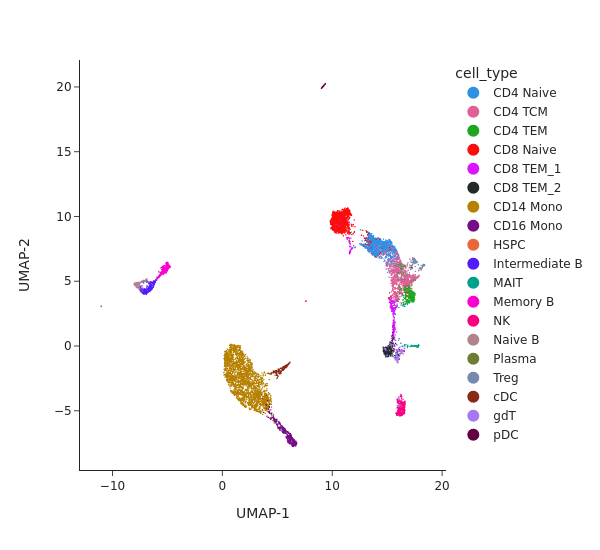

In [6]:
snap.pl.umap(rna, color='cell_type', interactive=False, height=550)

## Analyze chromatin accessibility data

In [7]:
atac = snap.read(snap.datasets.pbmc10k_multiome(modality='ATAC'), backed=None)
atac

AnnData object with n_obs × n_vars = 9631 × 107194
    obs: 'domain', 'cell_type'
    var: 'feature_types'
    uns: 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap'

In [8]:
snap.tl.spectral(atac, features=None)
snap.tl.umap(atac)

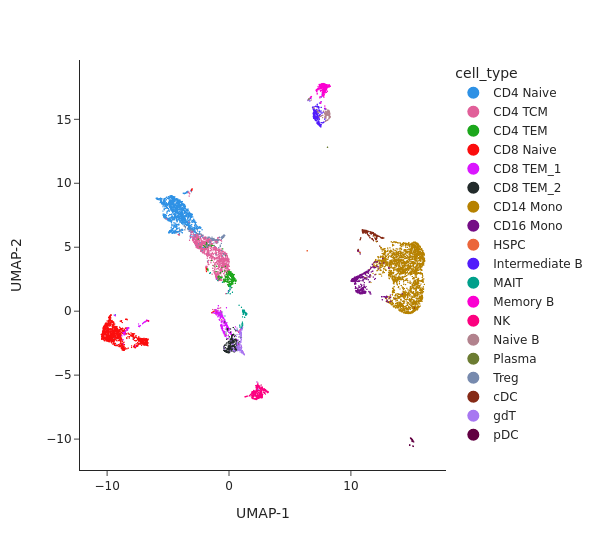

In [9]:
snap.pl.umap(atac, color="cell_type", interactive=False, height=550)

## Perform joint embedding

In [10]:
assert (rna.obs_names == atac.obs_names).all()

In [13]:
embedding = snap.tl.multi_spectral([rna, atac], features=None)[1]

2023-04-13 23:04:40 - INFO - Compute normalized views...
2023-04-13 23:05:44 - INFO - Compute embedding...


In [14]:
atac.obsm['X_joint'] = embedding
snap.tl.umap(atac, use_rep='X_joint')

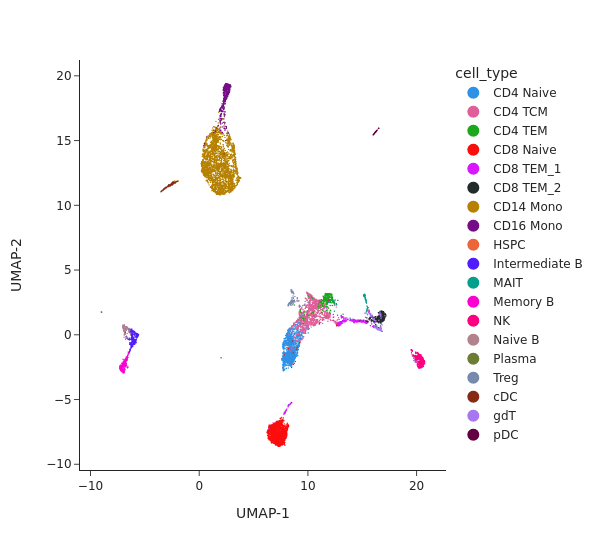

In [15]:
snap.pl.umap(atac, color="cell_type", interactive=False, height=550)